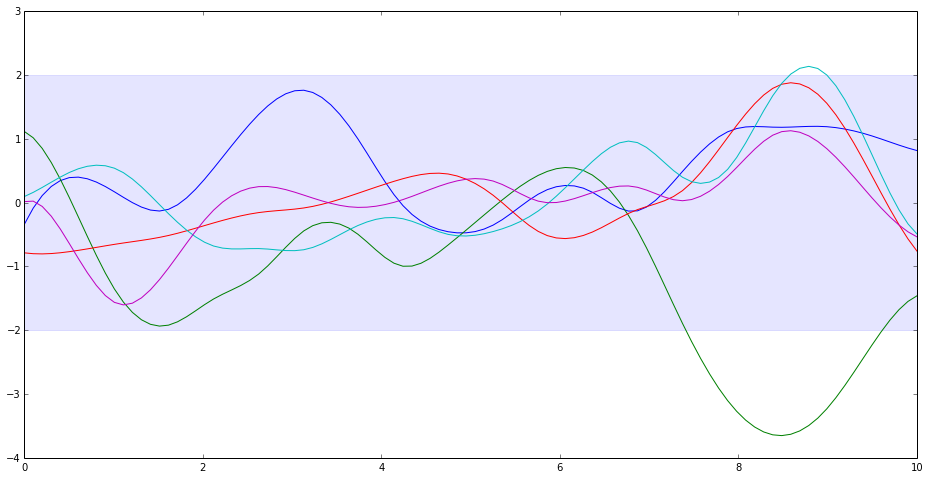

In [318]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline
x = []
y = []

def covar(x1,x2,sigma,p):
    variance_factor = 1 # We can change the overall varriance factor as well.
    return variance_factor*np.exp((-(np.abs(x1-x2)**p))/(2*sigma**p))
def covarMatrix(x1,x2,sigma=1,p=2):
    K = np.zeros(len(x1)*len(x2)).reshape(len(x1),len(x2))
    for i in range(len(x1)):
        for j in range(len(x2)):
            c = covar(x1[i],x2[j],sigma,p)
            K[i][j] = c
    return K
#Prior functions
mean = np.zeros(20)
I = np.eye(20)
u =  np.random.multivariate_normal(mean,I)
#plt.plot(u)
plt.figure(figsize=(16,8))

x = np.linspace(0,10,20)
K = covarMatrix(x,x,0.8,2) + 0.001 * I
#L = np.linalg.cholesky(K)

draw = 5
for i in range(draw):
    y = np.random.multivariate_normal(mean,K)
    #y2 = np.random.multivariate_normal(mean,K+0.001*I)
    #y3 = np.random.multivariate_normal(mean,K+0.001*I)
    #plt.plot(x,y)
    x_smooth = np.linspace(0,10,100)
    y_smooth = spline(x,y,x_smooth)
    plt.plot(x_smooth,y_smooth)

#plt.plot(x,y3)

y3 = np.random.multivariate_normal(mean,K+0.001*I)
#plt.plot(x,y3)
plt.fill_between(x,2,-2,color='blue',alpha='0.1')

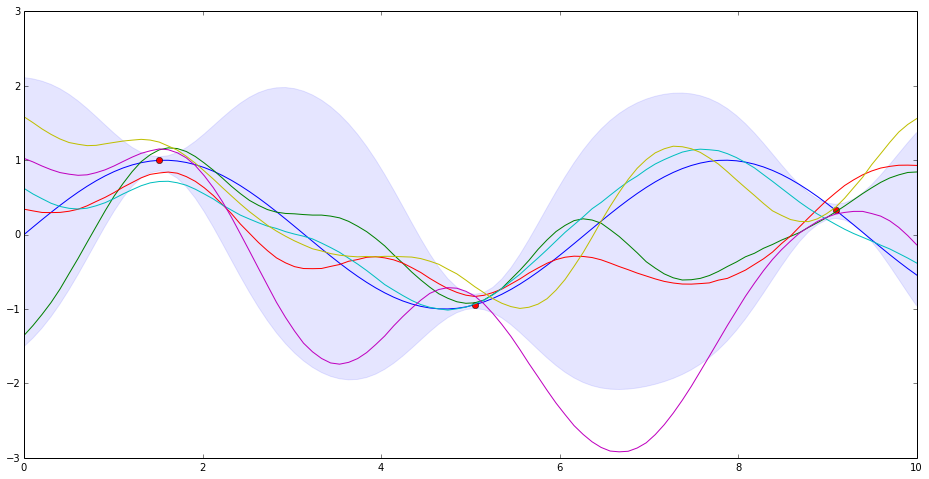

In [328]:
total_points = 100
datax = np.linspace(0,10,total_points)
plt.figure(figsize=(16,8))


datay = map(lambda x: np.sin(x) , datax)
d = [15,50,90]

plt.plot(datax,datay)
sigma = 1 # Scale indicates 
#how much one needs to move in x axis to change the value significatly

#Also, overall variance factor 
p = 2
epsilon = 0.00001

for index in d :
    plt.plot(datax[index],datay[index],'ro')

f = map(lambda j : datay[j],d)
x = map(lambda j : datax[j],d)

noisy_prediction = True
K = covarMatrix(x,x,sigma,p) 

if(noisy_prediction):
    K = K + 0.05*np.eye(len(d))
deviations = 2

mus = []
uppers = []
lowers = []
for i in range(len(datax)):
    xi = datax[i]
    mu = 0.0
    upper = 0.0
    lower = 0.0
    #if(i in d):
    #    mu = datay[i]
    #    upper = datay[i]
    #    lower = datay[i]
    #else:
    k =  map(lambda x : covar(x,xi,sigma,p), x)
    mu = np.dot(np.dot(np.transpose(k) , np.linalg.inv(K)) , f)
    lower = mu - deviations*(1 - np.dot(np.dot(np.transpose(k) , np.linalg.inv(K)) , k))
    upper = mu + deviations*(1 - np.dot(np.dot(np.transpose(k) , np.linalg.inv(K)) , k))
    mus.append(mu)
    lowers.append(lower)
    uppers.append(upper)
K_X1X1 =  covarMatrix(datax,datax,sigma,p)
K_X1X  = covarMatrix(datax,x,sigma,p)
K_XX1  = covarMatrix(x,datax,sigma,p) 
K2 = K_X1X1 - np.dot(np.dot(K_X1X, np.linalg.inv(K)),K_XX1) + epsilon*np.eye(100)
# epsilon*I is added for stability...

draws = 5
for i in range(draws): 
    ypred = np.random.multivariate_normal(mus,K2)

    x_smooth = np.linspace(0,10,100)
    y_smooth = spline(datax,ypred,x_smooth)
    plt.plot(x_smooth,y_smooth)
plt.fill_between(datax,lowers,uppers,color='blue',alpha='0.1')




In [ ]:
def GaussianRegression(X,y,k,noiselevel,x_star):
    L = np.linalg.cholesky(K+noiselevel*np.eye(K.size))
    alpha = np.linalg.solve(L.T,np.linalg.solve(L,y))
    f_star = np.dot(k_star.T,alpha)
    v = np.linalg.solve(L,k_star)
    
    

In [330]:
K.size

9